In [1]:
import requests
import zipfile
from tqdm import tqdm
from inference.model_prediction import *
from utils.visualize import *

In [2]:
# Download with progress bar
def download(url, fname):
    resp = requests.get(url, stream=True)
    total = int(resp.headers.get('content-length', 0))
    with open(fname, 'wb') as file, tqdm(desc=fname, total=total, unit='iB', unit_scale=True, unit_divisor=1024) as bar:
        for data in resp.iter_content(chunk_size=1024):
            size = file.write(data)
            bar.update(size)

# Download and Decompression PLM-Segformer models from release
url = 'https://github.com/Ryan21wy/PLM_Segformer/releases/download/v1.0/PLM_Segformer_models.zip'
download(url, 'PLM_Segformer_models.zip')

zip_file = zipfile.ZipFile('PLM_Segformer_models.zip')
zip_file.extractall('PLM_Segformer_models')
zip_file.close()

PLM_Segformer_models.zip: 100%|████████████████████████████████████████████████████| 242M/242M [00:43<00:00, 5.90MiB/s]


In [3]:
# predict segmentation mask for each damage, label_path can be absent
pred = prediction(r"data\imgs", r"PLM_Segformer_models", label_path=r'data\labels', n_class=2, crop_size=(512, 768), TTA=False, TLC=False, post=False)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:10<00:00,  5.35s/it]

class IoU:
[0.859, 0.673, 0.468, 0.805, 0.967]


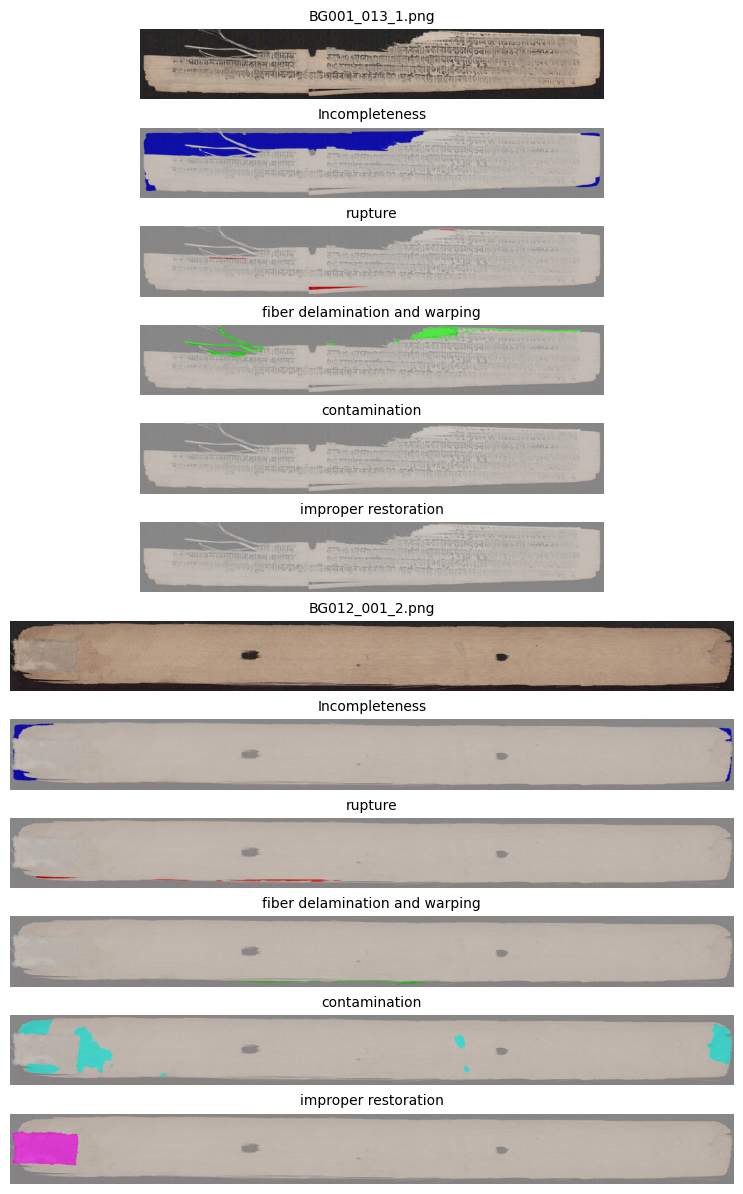

In [4]:
# visualize the damage segmentation masks
visualize_mask(pred)